In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
with open('/n/ramanathan_lab/aboesky/reward_contours/contours_1000.pkl', 'rb') as f:
    contours = pickle.load(f)

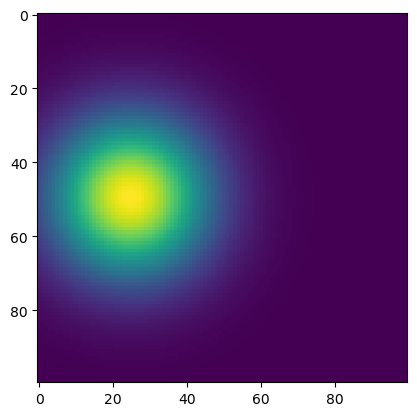

In [9]:
plt.imshow(contours[500])

In [16]:
with open('/n/ramanathan_lab/aboesky/moving_peak_results/agent_1.pkl', 'rb') as f:
    test = pickle.load(f)

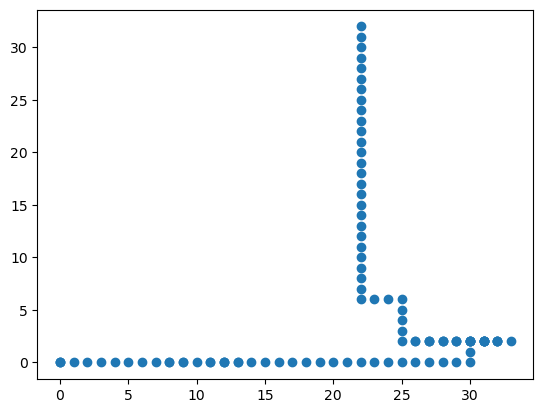

In [17]:
plt.scatter(test[:, 0], test[:, 1])